## 参考文献
- https://rightcode.co.jp/blog/information-technology/pytorch-mnist-learning
- https://qiita.com/TKC-tkc/items/42ff569be496621fc016

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torchvision import datasets, transforms
import PIL

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 1000) # MNISTは28*28*255 ≒ 20万のパターンがあるデータ。これを１０００次元にまで削減する
        self.fc2 = torch.nn.Linear(1000, 10) # 1000成分ベクトルを10成分ベクトルにする、これが0-9の分類に対応。各成分の値は確率。
    
    
    def forward(self,x):
        x = self.fc1(x)
        x = torch.sigmoid(x) # 活性化関数はシグモイド関数を使う
        x = self.fc2(x)

        return f.log_softmax(x, dim=1) # 出力層はsoft-max関数を使う

# ニューラルネットの定義はこれだけ！
model = Net()

参考文献
- https://qiita.com/fukuit/items/215ef75113d97560e599

In [4]:
def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)

    return {'train': train_loader, 'test': test_loader}


In [17]:

# 学習回数
epoch = 20

# 学習結果の保存用
history = {
    'train_loss': [],
    'test_loss': [],
    'test_acc': [],
}

# ネットワークを構築
net: torch.nn.Module = Net()

# MNISTのデータローダーを取得
loaders = load_MNIST()

optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

for e in range(epoch):

    """ Training Part"""
    loss = None

    # 学習開始 (再開)
    net.train(True)  # 引数は省略可能

    for i, (data, target) in enumerate(loaders['train']):
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        output = net(data)
        loss = f.nll_loss(output, target)

        loss.backward()
        optimizer.step()

        if i % 10 == 0:
            print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(e+1,
                                                                                     (i+1)*128,
                                                                                     loss.item())
                     )

    history['train_loss'].append(loss)

    """ Test Part """
    # 学習のストップ
    net.eval()  # または net.train(False) でも良い
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data = data.view(-1, 28 * 28)
            output = net(data)
            test_loss += f.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= 10000

    print('Test loss (avg): {}, Accuracy: {}'.format(test_loss,
                                                     correct / 10000))

    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct / 10000)



Training log: 1 epoch (128 / 60000 train. data). Loss: 2.3528034687042236
Training log: 1 epoch (1408 / 60000 train. data). Loss: 1.8666446208953857
Training log: 1 epoch (2688 / 60000 train. data). Loss: 1.3740673065185547
Training log: 1 epoch (3968 / 60000 train. data). Loss: 1.1048239469528198
Training log: 1 epoch (5248 / 60000 train. data). Loss: 0.835023045539856
Training log: 1 epoch (6528 / 60000 train. data). Loss: 0.6920554637908936
Training log: 1 epoch (7808 / 60000 train. data). Loss: 0.5321958065032959
Training log: 1 epoch (9088 / 60000 train. data). Loss: 0.5477780103683472
Training log: 1 epoch (10368 / 60000 train. data). Loss: 0.5142160654067993
Training log: 1 epoch (11648 / 60000 train. data). Loss: 0.4580782949924469
Training log: 1 epoch (12928 / 60000 train. data). Loss: 0.4287625551223755
Training log: 1 epoch (14208 / 60000 train. data). Loss: 0.48491013050079346
Training log: 1 epoch (15488 / 60000 train. data). Loss: 0.3890364170074463
Training log: 1 epoch

Training log: 3 epoch (20608 / 60000 train. data). Loss: 0.11098121851682663
Training log: 3 epoch (21888 / 60000 train. data). Loss: 0.21464309096336365
Training log: 3 epoch (23168 / 60000 train. data). Loss: 0.12204588949680328
Training log: 3 epoch (24448 / 60000 train. data). Loss: 0.10000423341989517
Training log: 3 epoch (25728 / 60000 train. data). Loss: 0.16419266164302826
Training log: 3 epoch (27008 / 60000 train. data). Loss: 0.21028202772140503
Training log: 3 epoch (28288 / 60000 train. data). Loss: 0.09872440993785858
Training log: 3 epoch (29568 / 60000 train. data). Loss: 0.1561657190322876
Training log: 3 epoch (30848 / 60000 train. data). Loss: 0.1026986688375473
Training log: 3 epoch (32128 / 60000 train. data). Loss: 0.19705736637115479
Training log: 3 epoch (33408 / 60000 train. data). Loss: 0.1663469672203064
Training log: 3 epoch (34688 / 60000 train. data). Loss: 0.34448280930519104
Training log: 3 epoch (35968 / 60000 train. data). Loss: 0.2009119987487793
Tra

Training log: 5 epoch (35968 / 60000 train. data). Loss: 0.08487856388092041
Training log: 5 epoch (37248 / 60000 train. data). Loss: 0.10410808771848679
Training log: 5 epoch (38528 / 60000 train. data). Loss: 0.1325554996728897
Training log: 5 epoch (39808 / 60000 train. data). Loss: 0.15793463587760925
Training log: 5 epoch (41088 / 60000 train. data). Loss: 0.13342709839344025
Training log: 5 epoch (42368 / 60000 train. data). Loss: 0.07418759167194366
Training log: 5 epoch (43648 / 60000 train. data). Loss: 0.07851682603359222
Training log: 5 epoch (44928 / 60000 train. data). Loss: 0.0962606742978096
Training log: 5 epoch (46208 / 60000 train. data). Loss: 0.20388343930244446
Training log: 5 epoch (47488 / 60000 train. data). Loss: 0.09209572523832321
Training log: 5 epoch (48768 / 60000 train. data). Loss: 0.05876302719116211
Training log: 5 epoch (50048 / 60000 train. data). Loss: 0.07931571453809738
Training log: 5 epoch (51328 / 60000 train. data). Loss: 0.1314748078584671
Tr

Training log: 7 epoch (51328 / 60000 train. data). Loss: 0.11067335307598114
Training log: 7 epoch (52608 / 60000 train. data). Loss: 0.027964910492300987
Training log: 7 epoch (53888 / 60000 train. data). Loss: 0.06237402185797691
Training log: 7 epoch (55168 / 60000 train. data). Loss: 0.1303621530532837
Training log: 7 epoch (56448 / 60000 train. data). Loss: 0.09952236711978912
Training log: 7 epoch (57728 / 60000 train. data). Loss: 0.1424628049135208
Training log: 7 epoch (59008 / 60000 train. data). Loss: 0.046975139528512955
Test loss (avg): 0.09974847429990769, Accuracy: 0.9702
Training log: 8 epoch (128 / 60000 train. data). Loss: 0.10895831882953644
Training log: 8 epoch (1408 / 60000 train. data). Loss: 0.06590691208839417
Training log: 8 epoch (2688 / 60000 train. data). Loss: 0.03491322323679924
Training log: 8 epoch (3968 / 60000 train. data). Loss: 0.08711224794387817
Training log: 8 epoch (5248 / 60000 train. data). Loss: 0.02525004930794239
Training log: 8 epoch (6528

Training log: 10 epoch (7808 / 60000 train. data). Loss: 0.021628227084875107
Training log: 10 epoch (9088 / 60000 train. data). Loss: 0.13621786236763
Training log: 10 epoch (10368 / 60000 train. data). Loss: 0.04509781673550606
Training log: 10 epoch (11648 / 60000 train. data). Loss: 0.05147406458854675
Training log: 10 epoch (12928 / 60000 train. data). Loss: 0.06953559070825577
Training log: 10 epoch (14208 / 60000 train. data). Loss: 0.014737465418875217
Training log: 10 epoch (15488 / 60000 train. data). Loss: 0.09268917888402939
Training log: 10 epoch (16768 / 60000 train. data). Loss: 0.019133800640702248
Training log: 10 epoch (18048 / 60000 train. data). Loss: 0.0484098382294178
Training log: 10 epoch (19328 / 60000 train. data). Loss: 0.08893236517906189
Training log: 10 epoch (20608 / 60000 train. data). Loss: 0.02538367733359337
Training log: 10 epoch (21888 / 60000 train. data). Loss: 0.03560527041554451
Training log: 10 epoch (23168 / 60000 train. data). Loss: 0.0684413

Training log: 12 epoch (20608 / 60000 train. data). Loss: 0.020374903455376625
Training log: 12 epoch (21888 / 60000 train. data). Loss: 0.020116746425628662
Training log: 12 epoch (23168 / 60000 train. data). Loss: 0.08095579594373703
Training log: 12 epoch (24448 / 60000 train. data). Loss: 0.02993413247168064
Training log: 12 epoch (25728 / 60000 train. data). Loss: 0.020378196612000465
Training log: 12 epoch (27008 / 60000 train. data). Loss: 0.02307731658220291
Training log: 12 epoch (28288 / 60000 train. data). Loss: 0.12506213784217834
Training log: 12 epoch (29568 / 60000 train. data). Loss: 0.038130830973386765
Training log: 12 epoch (30848 / 60000 train. data). Loss: 0.07592593878507614
Training log: 12 epoch (32128 / 60000 train. data). Loss: 0.021343737840652466
Training log: 12 epoch (33408 / 60000 train. data). Loss: 0.01736573502421379
Training log: 12 epoch (34688 / 60000 train. data). Loss: 0.01828763447701931
Training log: 12 epoch (35968 / 60000 train. data). Loss: 0

Training log: 14 epoch (35968 / 60000 train. data). Loss: 0.031278952956199646
Training log: 14 epoch (37248 / 60000 train. data). Loss: 0.015151750296354294
Training log: 14 epoch (38528 / 60000 train. data). Loss: 0.012152510695159435
Training log: 14 epoch (39808 / 60000 train. data). Loss: 0.03507557883858681
Training log: 14 epoch (41088 / 60000 train. data). Loss: 0.016289224848151207
Training log: 14 epoch (42368 / 60000 train. data). Loss: 0.012484850361943245
Training log: 14 epoch (43648 / 60000 train. data). Loss: 0.014220657758414745
Training log: 14 epoch (44928 / 60000 train. data). Loss: 0.025290513411164284
Training log: 14 epoch (46208 / 60000 train. data). Loss: 0.009427745826542377
Training log: 14 epoch (47488 / 60000 train. data). Loss: 0.014678113162517548
Training log: 14 epoch (48768 / 60000 train. data). Loss: 0.01576312445104122
Training log: 14 epoch (50048 / 60000 train. data). Loss: 0.020564109086990356
Training log: 14 epoch (51328 / 60000 train. data). Lo

Training log: 16 epoch (48768 / 60000 train. data). Loss: 0.008262150920927525
Training log: 16 epoch (50048 / 60000 train. data). Loss: 0.01112847775220871
Training log: 16 epoch (51328 / 60000 train. data). Loss: 0.011053076013922691
Training log: 16 epoch (52608 / 60000 train. data). Loss: 0.02626205049455166
Training log: 16 epoch (53888 / 60000 train. data). Loss: 0.010701760649681091
Training log: 16 epoch (55168 / 60000 train. data). Loss: 0.0031612035818398
Training log: 16 epoch (56448 / 60000 train. data). Loss: 0.011190321296453476
Training log: 16 epoch (57728 / 60000 train. data). Loss: 0.00875909999012947
Training log: 16 epoch (59008 / 60000 train. data). Loss: 0.01616249792277813
Test loss (avg): 0.0625580221167067, Accuracy: 0.981
Training log: 17 epoch (128 / 60000 train. data). Loss: 0.02952992171049118
Training log: 17 epoch (1408 / 60000 train. data). Loss: 0.0023753060959279537
Training log: 17 epoch (2688 / 60000 train. data). Loss: 0.01431434415280819
Training l

Test loss (avg): 0.061536193948984144, Accuracy: 0.9822
Training log: 19 epoch (128 / 60000 train. data). Loss: 0.00863226130604744
Training log: 19 epoch (1408 / 60000 train. data). Loss: 0.010167337022721767
Training log: 19 epoch (2688 / 60000 train. data). Loss: 0.004936558194458485
Training log: 19 epoch (3968 / 60000 train. data). Loss: 0.002090857829898596
Training log: 19 epoch (5248 / 60000 train. data). Loss: 0.0041291117668151855
Training log: 19 epoch (6528 / 60000 train. data). Loss: 0.0017516578081995249
Training log: 19 epoch (7808 / 60000 train. data). Loss: 0.010481477715075016
Training log: 19 epoch (9088 / 60000 train. data). Loss: 0.006182265002280474
Training log: 19 epoch (10368 / 60000 train. data). Loss: 0.006285377312451601
Training log: 19 epoch (11648 / 60000 train. data). Loss: 0.003549168584868312
Training log: 19 epoch (12928 / 60000 train. data). Loss: 0.0021062083542346954
Training log: 19 epoch (14208 / 60000 train. data). Loss: 0.0036505151074379683
Tr

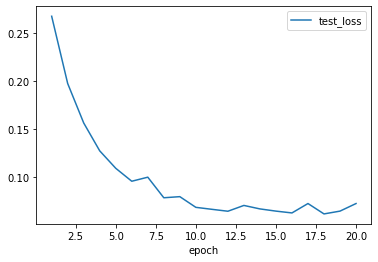

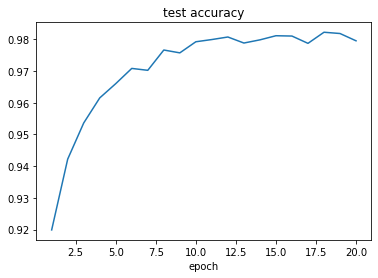

In [18]:
# 結果の出力と描画
plt.figure()
#plt.plot(range(1, epoch+1), history['train_loss'], label='train_loss')
plt.plot(range(1, epoch+1), history['test_loss'], label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss.png')

plt.figure()
plt.plot(range(1, epoch+1), history['test_acc'])
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('test_acc.png')

In [13]:
len(history['train_loss'])

9380

20